<center>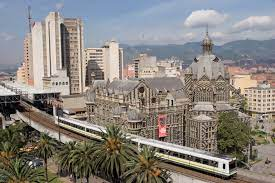</center>

# <div style="text-align:center"> Proyecto Capstone - La Batalla de los Vecindarios </div>

# Introducción<a id="1"></a>

En este proyecto vamos a abordar cada uno de los barrios de la ciudad de Medellín - Colombia, con el fin de determinar en cual barrio es mejor establecer un negocio de Barber Shop.

Para llevar esto a cabo vamos a hacer uso de diferentes herramientas, una de ellas es la base de datos de barrios Veredas de la ciudad de Medellín, base de datos proporcionada por la alcaldía de Medellín, y la otra herramienta es la API de Foursqueare, la cual vamos a utilziar para analizar a detalle cada uno de los barrios.

# Problema Comercial<a id="2"></a>

Este problema surge de la motivación de un familiar X por entablar un negocio de Barber Shop en la ciudad de Medellín, sin embargo no sabe donde es mejor, debido a la gran demanda que estan presentando estos sitios actualmente.

Con base en lo anterior, utilizaremos Ciencia de Datos para generar Clusters y así saber en cual barrio de Medellín es mas factible entablar una barberia y donde no.

# Datos<a id="3"></a>

Para este proyecto nos basamos en la fuente de datos **Bario Vereda** la cual la encontramos en la página web **GeoMedellín**, sitio web administrado por la Alcaldía de Medellín. En esta fuente de datos, encontraremos cada uno de los barrios de la ciudad de Medellín.

Como segundo recurso utilizamos la librería **geopy** para encontrar los valores de latitud y longitud para cada uno de los barrios.

Una vez tengamos el DataFrame de los barrios de Medellín con sus respectivas coordenadas, procederemos a usar la API de Foursquare para analizar cada uno de los barrios.

In [1]:
import numpy as np # librería para manejar datos vectorizados

import pandas as pd # librería para análisis de datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # librería para manejar archivos JSON 

!conda install -c conda-forge geopy --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud

import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas

# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare
import folium # librería para graficar mapas 

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare


Libraries imported.


In [67]:
#Cargar set de datos
df = pd.read_csv(r'C:\Users\sergio.carmona\Documents\Certificados Curso DataScience\Videos Curso DataScience\Curso 9. Capstone\Capstone_Final\Barrio_Vereda.csv')
df.head()

,OBJECTID,CODIGO,NOMBRE,SUBTIPO_BARRIOVEREDA,NOMBRE_COMUNA_CORREGIMIENTO,SHAPEAREA,SHAPELEN
0,1112,0510,Tricentenario,1,Castilla,420637.970349,2897.304229
1,1113,0208,Villa Niza,1,Santa Cruz,143215.327504,1697.303318
2,1114,1108,Laureles,1,Laureles Estadio,707014.821267,3847.112683
3,1115,1303,Santa Rosa de Lima,1,San Javier,139970.996369,2158.954261
4,1116,1206,Santa Lucía,1,La América,275913.740234,3048.703385


In [68]:
#Borrar columnas innecesarias
df = df.drop('OBJECTID',1).drop('SUBTIPO_BARRIOVEREDA',1).drop('NOMBRE_COMUNA_CORREGIMIENTO',1).drop('SHAPEAREA',1).drop('SHAPELEN',1)

In [69]:
df.head()

,CODIGO,NOMBRE
0,0510,Tricentenario
1,0208,Villa Niza
2,1108,Laureles
3,1303,Santa Rosa de Lima
4,1206,Santa Lucía


In [70]:
#Prueba ciclo For
for i, row in df.head().iterrows():
    print(row['NOMBRE'])

Tricentenario
Villa Niza
Laureles
Santa Rosa de Lima
Santa Lucía


In [71]:
# Traer valores de latitud y longitud para cada barrio de Medellín
for i, row in df.iterrows():
    try:
        
        adress = row['NOMBRE']
        geolocator = Nominatim(user_agent='ny_explorer')
        location = geolocator.geocode(adress)
        latitude = location.latitude
        longitude = location.longitude
        df.loc[i, 0] = latitude
        df.loc[i, 1] = longitude
        #print('las coordenadas de {} son {}, {}'.format(adress, latitude, longitude) )
    except:
        print(adress)

df.rename(columns={0:'Latitude',1:'Longitude'}, inplace=True)

Buga Patio Bonito
Área de Expansión El Noral
Facultad Veterinaria y Zootecnia U.de.A.
Potrera Miserenga
Área de Expansión San Cristóbal
Área de Expansión Altavista
Área de Expansión Belén Rincón
Cabecera Urbana Corregimiento San Cristóbal
Área de Expansión Pajarito
Área de Expansión San Antonio de Prado
Facultad de Minas U. Nacional


In [72]:
df.head()

,CODIGO,NOMBRE,Latitude,Longitude
0,0510,Tricentenario,6.291070,-75.566325
1,0208,Villa Niza,6.295645,-75.563450
2,1108,Laureles,-31.498759,-57.525990
3,1303,Santa Rosa de Lima,14.436619,-90.352043
4,1206,Santa Lucía,10.306021,-66.658849
